In [ ]:
# https://www.youtube.com/watch?v=NvzofNF0jqI
from textacy.extract import subject_verb_object_triples
from matplotlib import pylab as plt
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
#NOTE: 
'''
textacy is a Python library for performing a variety of natural language processing (NLP) tasks, 
built on the high-performance spacy library. With the fundamentals – tokenization, part-of-speech tagging, dependency parsing, etc. – 
delegated to another library, textacy focuses on the tasks that come before and follow after.
'''
pip install textacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.4/208.4 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.4 MB/s eta 0:00:00
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp38-cp38-linux_x86_64.whl size=70625 sha256=e4bbe8e166b286b01159f5dd1f10bf9fa427efbb77f28eaf1ca3cbf82627c291
  Stored in directory: /root/.cache/pip/wheels/f1/c7/3c/4c83132de76359e3a429fd09c08995945ca96c5290a41651d3
Successfully built jellyfish


In [ ]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-06 14:20:18.304106: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
text ="France , officially the French Republic (French: République française)[1] is a transcontinental"\
"country spanning Western Europe and overseas regions and territories in South America and the Atlantic,"\
"Pacific and Indian Oceans.[XIII] Including all of its territories,"\
"France has twelve time zones, the most of any country."\
"Its metropolitan area extends from the Rhine to the Atlantic Ocean and from the Mediterranean Sea"\
"to the English Channel and the North Sea; overseas territories include French Guiana in South America,"\
" Saint Pierre and Miquelon in North Atlantic, French West Indies and several islands in Oceania and Indian Ocean."\
" Due to its several coastal territories, France has the largest exclusive economic zone in the world."\
" France borders Belgium, Luxembourg, Germany, Switzerland, Monaco, Italy, Andorra and Spain in Europe,"\
" as well as the Netherlands, Suriname and Brazil in the Americas. "\
"Its eighteen integral regions (five of which are overseas) span a combined area of 643,801 km2"\
"(248,573 sq mi) and over 67 million people (as of May 2021)."\
" France is a unitary semi-presidential republic with its capital in Paris, the" \
"country's largest city and main cultural and commercial centre; "\
"other major urban areas include Lyon, Marseille, Toulouse, Bordeaux, Lille and Nice."

In [ ]:

document = nlp(text)

sentences_in_doc = list(document.sents)
for sentence in sentences_in_doc:
    print (sentence)


France , officially the French Republic (French: République française)[1] is a transcontinentalcountry spanning Western Europe and overseas regions and territories in South America and the Atlantic,Pacific and Indian Oceans.[XIII] Including all of its territories,France has twelve time zones, the most of any country.
Its metropolitan area extends from the Rhine to the Atlantic Ocean and from the Mediterranean Seato the English Channel and the North Sea; overseas territories include French Guiana in South America, Saint Pierre and Miquelon in North Atlantic, French West Indies and several islands in Oceania and Indian Ocean.
Due to its several coastal territories, France has the largest exclusive economic zone in the world.
France borders Belgium, Luxembourg, Germany, Switzerland, Monaco, Italy, Andorra and Spain in Europe, as well as the Netherlands, Suriname and Brazil in the Americas.
Its eighteen integral regions (five of which are overseas) span a combined area of 643,801 km2(248,5

In [ ]:

from tqdm import tqdm

In [ ]:
triples_raw = []

for i in tqdm(sentences_in_doc):  
    iterator = subject_verb_object_triples(i)
    phrase_triples = []
    for svo in iterator:
        phrase_triples.append(svo)
    triples_raw.append(phrase_triples)

100%|██████████| 6/6 [00:00<00:00, 3040.09it/s]


In [ ]:
from itertools import chain
triples_final = list(chain.from_iterable(triples_raw))

In [ ]:
triples_raw

[[SVOTriple(subject=[France], verb=[has], object=[time, zones])],
 [SVOTriple(subject=[territories], verb=[include], object=[French, Guiana, Saint, Pierre, Miquelon, West, Indies, islands])],
 [SVOTriple(subject=[France], verb=[has], object=[zone])],
 [SVOTriple(subject=[France], verb=[borders], object=[Belgium, Luxembourg, Germany, Switzerland, Monaco, Italy, Andorra, Spain, Netherlands, Suriname, Brazil])],
 [SVOTriple(subject=[regions], verb=[span], object=[area])],
 [SVOTriple(subject=[areas], verb=[include], object=[Lyon, Marseille, Toulouse, Bordeaux, Lille, Nice])]]

In [ ]:
triples_final

[SVOTriple(subject=[France], verb=[has], object=[time, zones]),
 SVOTriple(subject=[territories], verb=[include], object=[French, Guiana, Saint, Pierre, Miquelon, West, Indies, islands]),
 SVOTriple(subject=[France], verb=[has], object=[zone]),
 SVOTriple(subject=[France], verb=[borders], object=[Belgium, Luxembourg, Germany, Switzerland, Monaco, Italy, Andorra, Spain, Netherlands, Suriname, Brazil]),
 SVOTriple(subject=[regions], verb=[span], object=[area]),
 SVOTriple(subject=[areas], verb=[include], object=[Lyon, Marseille, Toulouse, Bordeaux, Lille, Nice])]

In [ ]:
sources = []
relations = []
targets = []


In [ ]:
for ep_item in triples_final:
    # check found items are not empty
    
    if ep_item:
        print(ep_item)
        # append source/relation/target
        #sources.append(ep_item[0])
        #relations.append(ep_item[1])
        #targets.append(ep_item[2])
        for i in ep_item[2]:
          sources.append(ep_item[0][0])
          relations.append(ep_item[1][0])
          targets.append(i)
    
    #else:
     #   print('Could not detect triples in phrase:', phrase)

SVOTriple(subject=[France], verb=[has], object=[time, zones])
SVOTriple(subject=[territories], verb=[include], object=[French, Guiana, Saint, Pierre, Miquelon, West, Indies, islands])
SVOTriple(subject=[France], verb=[has], object=[zone])
SVOTriple(subject=[France], verb=[borders], object=[Belgium, Luxembourg, Germany, Switzerland, Monaco, Italy, Andorra, Spain, Netherlands, Suriname, Brazil])
SVOTriple(subject=[regions], verb=[span], object=[area])
SVOTriple(subject=[areas], verb=[include], object=[Lyon, Marseille, Toulouse, Bordeaux, Lille, Nice])


In [ ]:
# create DataFrame
kg_df = pd.DataFrame({'source': sources, 'target': targets, 'edge': relations})

In [ ]:
kg_df

,source,target,edge
0,France,time,has
1,France,zones,has
2,territories,French,include
3,territories,Guiana,include
4,territories,Saint,include
5,territories,Pierre,include
6,territories,Miquelon,include
7,territories,West,include
8,territories,Indies,include
9,territories,islands,include


In [ ]:
import networkx as nx


In [ ]:
#G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
#NOTE: networkx is a library which help buidl graph: https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr="edge")

In [ ]:

nx_SG_d1 = nx.dfs_tree(G)
edge_labels = nx.get_edge_attributes(G,'edge')

In [ ]:
edge_labels

{(France, time): has,
 (France, zones): has,
 (territories, French): include,
 (territories, Guiana): include,
 (territories, Saint): include,
 (territories, Pierre): include,
 (territories, Miquelon): include,
 (territories, West): include,
 (territories, Indies): include,
 (territories, islands): include,
 (France, zone): has,
 (France, Belgium): borders,
 (France, Luxembourg): borders,
 (France, Germany): borders,
 (France, Switzerland): borders,
 (France, Monaco): borders,
 (France, Italy): borders,
 (France, Andorra): borders,
 (France, Spain): borders,
 (France, Netherlands): borders,
 (France, Suriname): borders,
 (France, Brazil): borders,
 (regions, area): span,
 (areas, Lyon): include,
 (areas, Marseille): include,
 (areas, Toulouse): include,
 (areas, Bordeaux): include,
 (areas, Lille): include,
 (areas, Nice): include}

In [ ]:

def plot_graph(graph): 
    plt.figure(figsize=(8,8))
    pos = nx.spring_layout(graph, k=0.5)  # k regulates the distance between nodes
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=800, edge_cmap=plt.cm.Blues, pos=pos)
    plt.show()

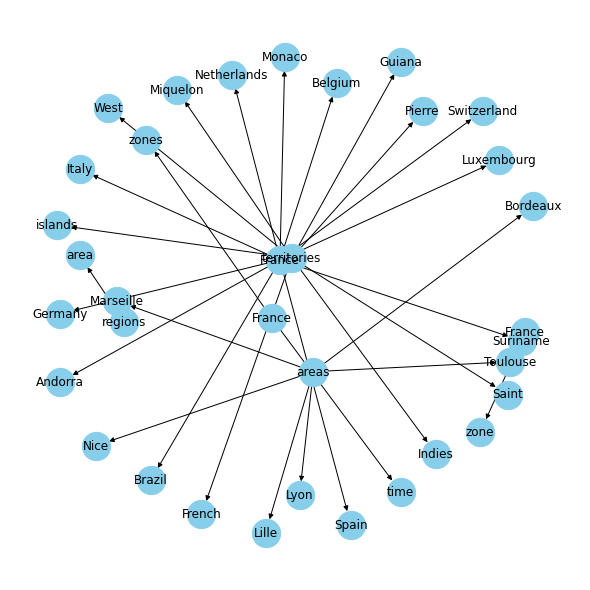

In [ ]:
plot_graph(nx_SG_d1)